<a href="https://colab.research.google.com/github/step-code01/Engineering_Design_Project_Simulator/blob/main/Engineering_design_project_v1_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

def static_deflection_cantilever(P, L, E, I):
    return (P*L**3)/(3*E*I)

def DMF_from_height(h, delta_s):
    return 1+np.sqrt(1+(2*h)/delta_s)

def impact_velocity(h):
    return np.sqrt(2*9.81*h)

def dynamic_stress(static_sigma, DMF):
    return static_sigma*DMF

In [ ]:
def rectangular_I(b, d):
    return (b*d**3)/12

def circular_I(d):
    return (np.pi*d**4)/64

def bending_stress(P, L, b, d, type="rect"):
    if type == "rect":
        I=rectangular_I(b, d)
    else:
        I=circular_I(d)

    y=d/2
    M=P*L/4
    sigma=M*y/I
    return sigma

def failure_load(sigma_fail, L, b, d, type="rect"):
    if type=="rect":
        I=rectangular_I(b, d)
    else:
        I=circular_I(d)

    y=d/2
    P=(sigma_fail*I*4)/(y*L)
    return P


In [ ]:
import matplotlib.pyplot as plt

def plot_trajectory(xs, ys, label="Trajectory"):
    plt.plot(xs, ys, label=label)
    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    plt.show()

def compare_trajectories(data):
    for xs, ys, name in data:
        plt.plot(xs, ys, label=name)

    plt.xlabel("Distance (m)")
    plt.ylabel("Height (m)")
    plt.legend()
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.8', color='gray')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='lightgray')
    plt.show()

In [ ]:
g = 9.81

def simulate_no_drag(v0, angle_deg, dt=0.01):
    theta=np.radians(angle_deg)
    vx=v0*np.cos(theta)
    vy=v0*np.sin(theta)

    x=0;y=0
    xs,ys=[],[]

    while y>=0:
        xs.append(x)
        ys.append(y)

        # update kr rha
        x+=vx*dt
        y+=vy*dt-0.5*g*dt**2
        vy-=g*dt

    return np.array(xs), np.array(ys)


def simulate_drag(v0, angle_deg, m, Cd, rho, D, dt=0.01):
    A=np.pi*(D/2)**2
    k=0.5*rho*Cd*A/m

    theta=np.radians(angle_deg)
    vx=v0*np.cos(theta)
    vy=v0*np.sin(theta)

    x=0;y=0
    xs,ys=[],[]

    while y>=0:
        xs.append(x); ys.append(y)

        v = np.sqrt(vx**2 + vy**2)

        #drag, -ve accn
        ax=-k*v*vx
        ay=-g-k*v*vy

        x+=vx*dt
        y+=vy*dt

        vx+=ax*dt
        vy+=ay*dt

    return np.array(xs), np.array(ys)

=== Projectile Simulation ===


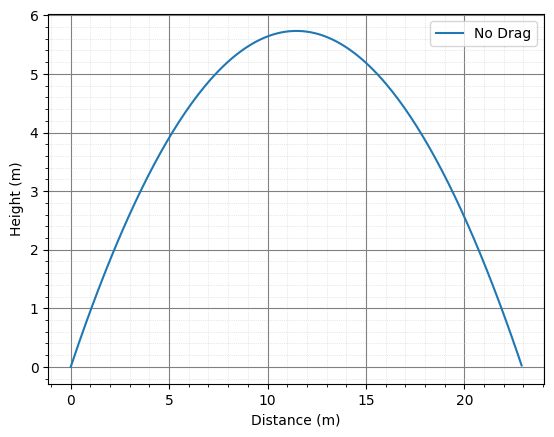

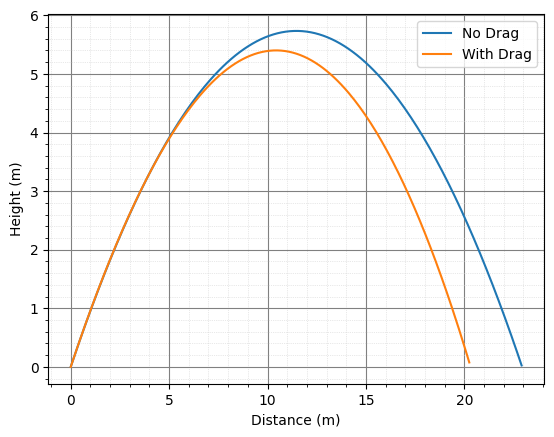


=== Static Beam Failure ===
Bending stress = 107999999.99999999 MPa

=== Dynamic Impact ===
Impact velocity = 1.9809088823063015 m/s
DMF = 29.30194339616981
Dynamic stress = 3164609886.7863393 MPa


In [ ]:
def main():

    print("=== Projectile Simulation ===")
    xs, ys=simulate_no_drag(15, 45)
    plot_trajectory(xs,ys,label="No Drag")

    xs_d, ys_d = simulate_drag(
        v0=15, angle_deg=45, m=0.05, Cd=0.4, rho=1.2, D=0.045
    )

    compare_trajectories([
        (xs, ys, "No Drag"),
        (xs_d, ys_d, "With Drag")
    ])

    print("\n=== Static Beam Failure ===")
    sigma = bending_stress(P=60, L=0.3, b=0.01, d=0.005)
    print("Bending stress =", sigma, "MPa")

    print("\n=== Dynamic Impact ===")
    h = 0.2
    v = impact_velocity(h)
    print("Impact velocity =", v, "m/s")

    delta_s = 0.0005
    dmf = DMF_from_height(h, delta_s)
    print("DMF =", dmf)

    sigma_dyn = dynamic_stress(sigma, dmf)
    print("Dynamic stress =", sigma_dyn, "MPa")

if __name__ == "__main__":
    main()
